# California Pacific Ocean Sound Recordings
https://registry.opendata.aws/pacific-sound/
MARS point: 36.713°N, 122.186°W
FILES TOO BIG: 

In [1]:
# get data from 2021

In [7]:
import os , glob
import pandas as pd
import xarray as xr
import s3fs, boto3, botocore
import geoviews as gv
from cartopy import crs
import time

/srv/conda/envs/notebook/lib/python3.9/site-packages/geoviews/operation/__init__.py:14: HoloviewsDeprecationWarning: 'ResamplingOperation' is deprecated and will be removed in version 1.17, use 'ResampleOperation2D' instead.
  from holoviews.operation.datashader import (


In [9]:
s3 = s3fs.S3FileSystem(anon=True)
bucket_name = 'pacific-sound-256khz-2021'

In [14]:
# grab only a handful of files per glob (every 150 files)
fp = s3.glob(f"{bucket_name}/**/*.wav")[3::144][:20]

In [15]:
fp

['pacific-sound-256khz-2021/01/MARS_20210101_003424.wav',
 'pacific-sound-256khz-2021/01/MARS_20210102_003424.wav',
 'pacific-sound-256khz-2021/01/MARS_20210103_003423.wav',
 'pacific-sound-256khz-2021/01/MARS_20210104_003423.wav',
 'pacific-sound-256khz-2021/01/MARS_20210105_003423.wav',
 'pacific-sound-256khz-2021/01/MARS_20210106_003423.wav',
 'pacific-sound-256khz-2021/01/MARS_20210107_003423.wav',
 'pacific-sound-256khz-2021/01/MARS_20210108_003413.wav',
 'pacific-sound-256khz-2021/01/MARS_20210109_003413.wav',
 'pacific-sound-256khz-2021/01/MARS_20210110_003413.wav',
 'pacific-sound-256khz-2021/01/MARS_20210111_003413.wav',
 'pacific-sound-256khz-2021/01/MARS_20210112_003413.wav',
 'pacific-sound-256khz-2021/01/MARS_20210113_003413.wav',
 'pacific-sound-256khz-2021/01/MARS_20210114_003413.wav',
 'pacific-sound-256khz-2021/01/MARS_20210115_003413.wav',
 'pacific-sound-256khz-2021/01/MARS_20210116_003413.wav',
 'pacific-sound-256khz-2021/01/MARS_20210117_003413.wav',
 'pacific-soun

In [16]:
client = boto3.client('s3', config=botocore.client.Config(signature_version=botocore.UNSIGNED))

In [6]:
os.makedirs('data/california-pam/')

In [17]:
for f in fp:
    file_name = os.path.basename(f)
    out_file = f'data/california-pam/{file_name}'
    client.download_file(
        Bucket=bucket_name,
        Key=os.path.relpath(f, bucket_name),
        Filename=out_file
    )
    time.sleep(0.5)

## Trim audio files since they are too big... take the first 30 seconds

In [20]:
from pydub import AudioSegment

In [21]:
for fp in glob.glob('data/california-pam/MARS_*.wav'):
    audio =AudioSegment.from_file(fp, format='wav')
    trimmed_audio = audio[:(120*1000)] # get first two minutes only
    output_file = os.path.join('data/california-pam/', f"2min_{os.path.basename(fp)}")
    trimmed_audio.export(output_file, format='wav')
    print('done...')
    time.sleep(0.5)

done...
done...
done...
done...
done...
done...
done...
done...
done...
done...
done...
done...
done...
done...
done...
done...
done...
done...
done...
done...


## Visualize

### using soundscape_IR

In [10]:
# Clone soundscape_IR from GitHub @schonkopf
! git clone https://github.com/schonkopf/soundscape_IR.git

Cloning into 'soundscape_IR'...
remote: Enumerating objects: 2315, done.
remote: Counting objects: 100% (415/415), done.
remote: Compressing objects: 100% (243/243), done.
remote: Total 2315 (delta 246), reused 317 (delta 172), pack-reused 1900
Receiving objects: 100% (2315/2315), 74.03 MiB | 27.41 MiB/s, done.
Resolving deltas: 100% (1506/1506), done.


In [11]:
! pip install -r soundscape_IR/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 64.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.8/39.8 MB 28.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 36.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 42.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 109.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 27.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.5/377.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 86.8 MB/s eta 0:00:00:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml)

In [4]:
from soundscape_IR.soundscape_viewer import audio_visualization
import matplotlib.pyplot as plt

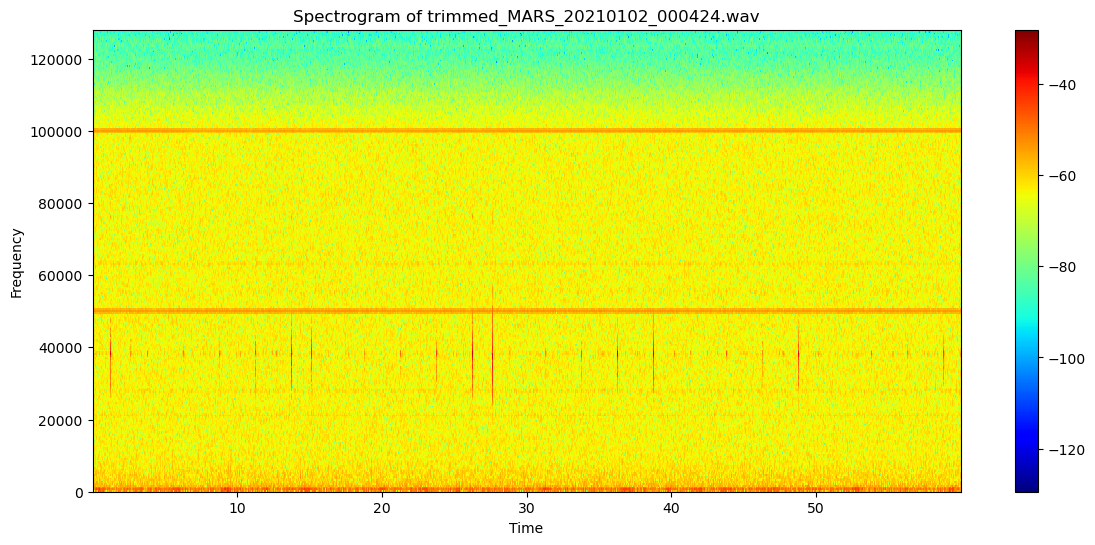

In [6]:
# constantly overflow memory
spec = audio_visualization(filename='trimmed_MARS_20210102_000424.wav', path='./data/california-pam/')

In [4]:
spec.FFT_size

512

### Using pylab/wave

In [1]:
import os
import wave

import pylab
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate


/tmp/ipykernel_1903/1740579681.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')


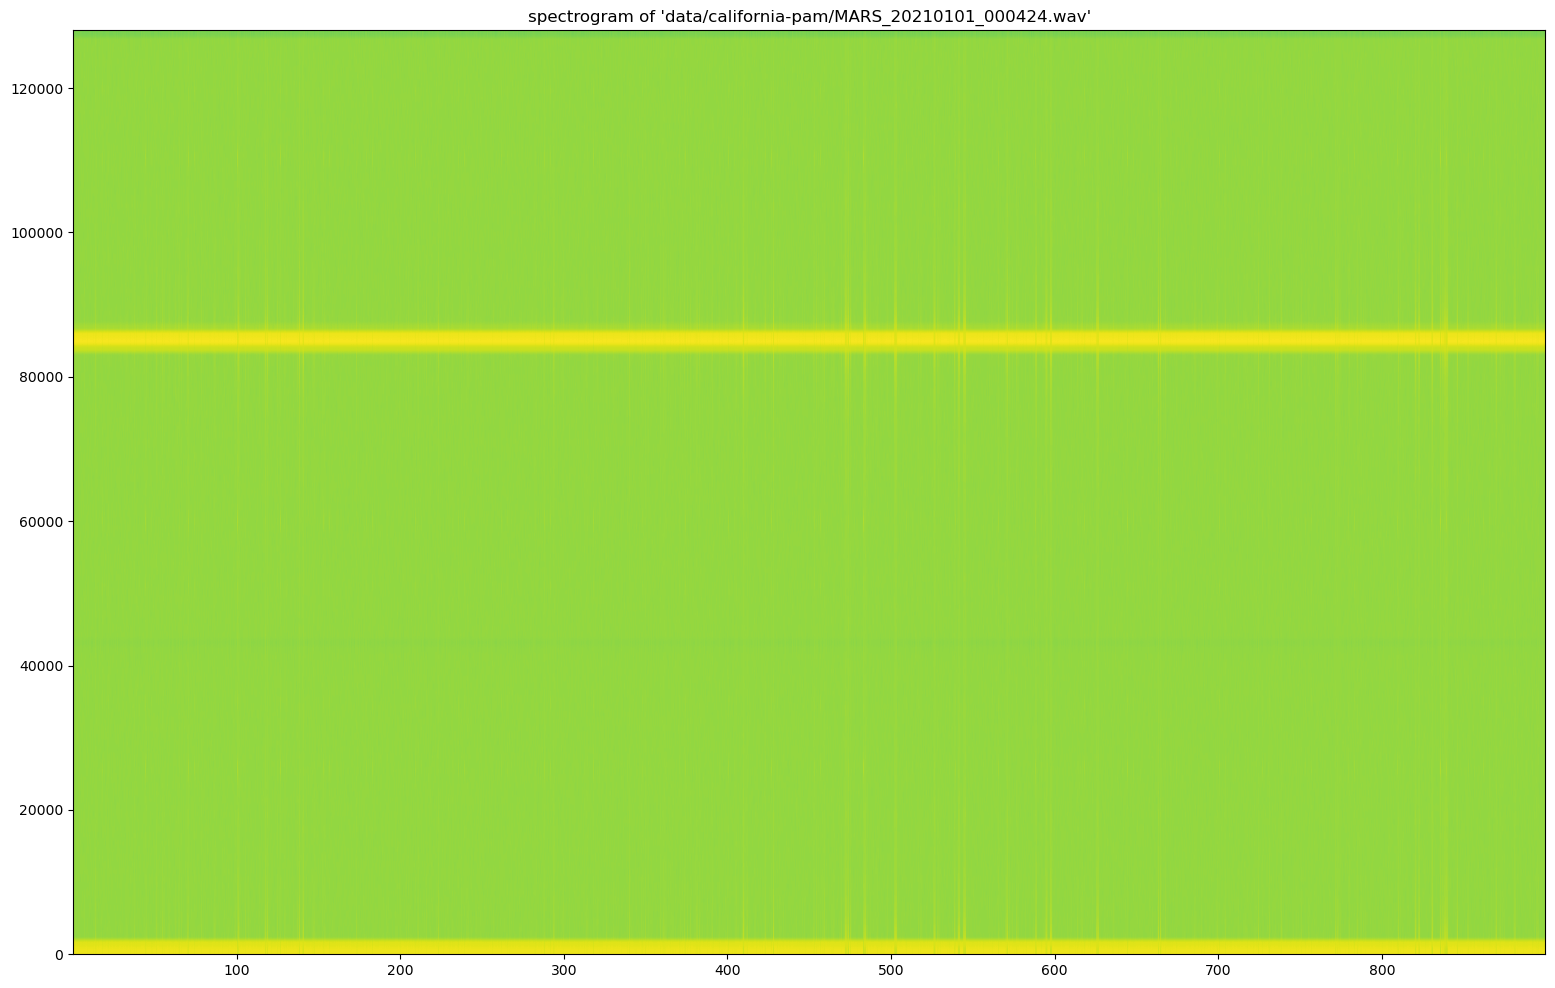

In [2]:
graph_spectrogram('data/california-pam/MARS_20210101_000424.wav')

### Using scipy

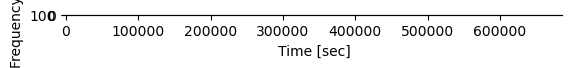

In [17]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('data/california-pam/MARS_20210101_000424.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

int32


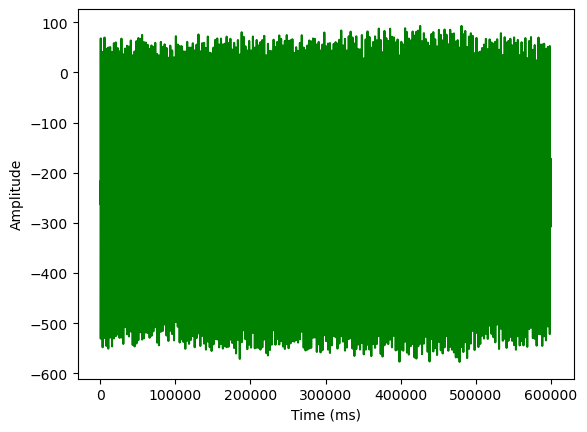

In [1]:
import numpy
import matplotlib.pyplot as plt
import pylab
from scipy.io import wavfile
from scipy.fftpack import fft


myAudio = "data/california-pam/MARS_20210101_000424.wav"

#Read file and get sampling freq [ usually 44100 Hz ]  and sound object
samplingFreq, mySound = wavfile.read(myAudio)

#Check if wave file is 16bit or 32 bit. 24bit is not supported
mySoundDataType = mySound.dtype
print(mySoundDataType)
#We can convert our sound array to floating point values ranging from -1 to 1 as follows

mySound = mySound / (2.**15)

#Check sample points and sound channel for duel channel(5060, 2) or  (5060, ) for mono channel

mySoundShape = mySound.shape
samplePoints = float(mySound.shape[0])

#Get duration of sound file
signalDuration =  mySound.shape[0] / samplingFreq
#Plotting the tone

# We can represent sound by plotting the pressure values against time axis.
#Create an array of sample point in one dimension
timeArray = numpy.arange(0, samplePoints, 1)

#
timeArray = timeArray / samplingFreq

#Scale to milliSeconds
timeArray = timeArray * 1000

#Plot the tone
plt.plot(timeArray, mySound, color='g')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()
